# workshop-Decision Tree
  This workshop deals with understanding the working of decision trees

# dataset Information
  The data sets contains 3 classes where each class refer to type of iris flower plant
  
  ## Attribute Information:
    1.sepal length in cm
    2.seal widht in cm
    3.petal length in cm
    4.petal width in cm
    5.class--iris setosa--iris versicolor--iris virginica

# Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

py.init_notebook_mode(connected=True)

import plotly.graph_objs as go

import plotly.tools as tls

import plotly.figure_factory as ff



# Loading the dataset

In [74]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# delet the columns
df=df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display the stats of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# to display the basic info of datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display the no of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Preprocessing the datasets

In [7]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory data analysis

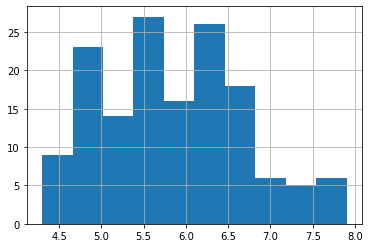

In [8]:
# Histogram
df['SepalLengthCm'].hist()

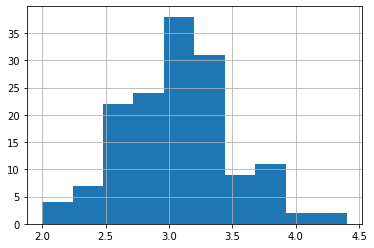

In [9]:
df['SepalWidthCm'].hist()

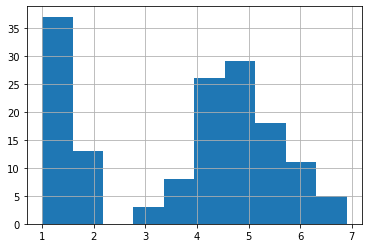

In [10]:
df['PetalLengthCm'].hist()

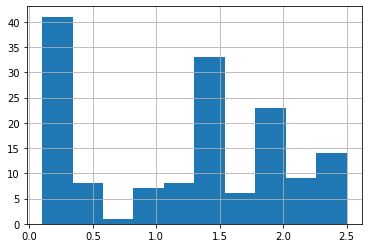

In [11]:
df['PetalWidthCm'].hist()

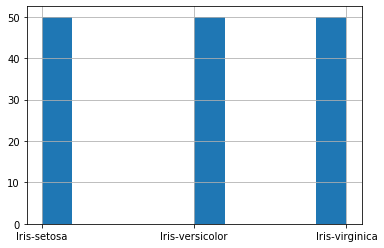

In [12]:
df['Species'].hist()

In [13]:
# scatter plot
colors=['red','orange','blue']
Species=['Iris-setosa','Iris-virginica','Iris-versicolor']

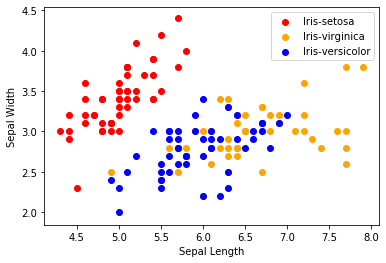

In [14]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

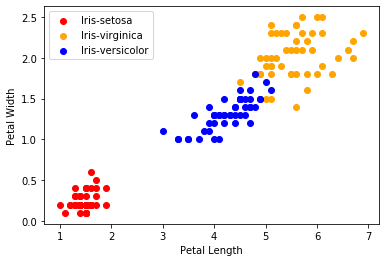

In [15]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

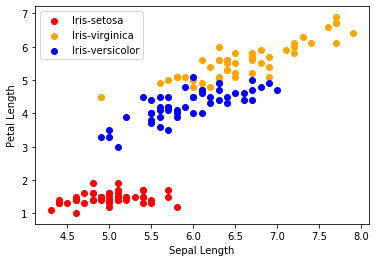

In [16]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

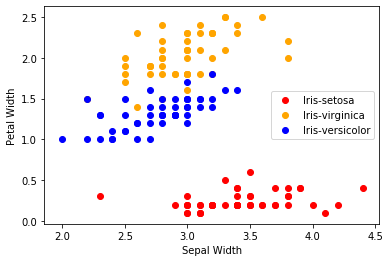

In [17]:
for i in range(3):
    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation matrix

In [18]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


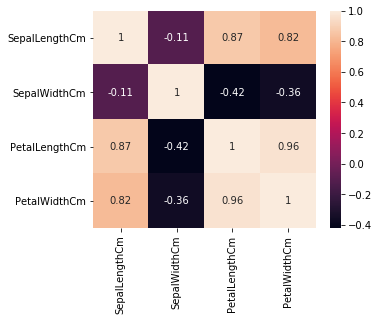

In [19]:
corr=df.corr()
fig, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True ,ax=ax)

# Label Encoder
 ### In machine learning.we usually deal with datasets which contains multiple labels in one or more than one columns.These labels can be in the form of words or numbers.Labels i Encoding refers to converting the labels into numeic form so as to convert it into the machine readable form

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df['Species'] =le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model training

In [22]:
from sklearn.model_selection import train_test_split

In [47]:
# train --70%
# test  --30%
x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [48]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [49]:
# Model training
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# print matrix to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [51]:
# knn-- k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [52]:
# Model training
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
# print matrix to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [58]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier()

In [59]:
# Model training
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
# print matrix to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 93.33333333333333


In [63]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model_tree, out_file=dot_data, feature_names=df.x,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

AttributeError: 'DataFrame' object has no attribute 'x'